In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/minor/yolov5model

/content/drive/MyDrive/minor/yolov5model


In [ ]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00


In [ ]:
import torch
import utils
display=utils.notebook_init()

YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.10.11 torch-2.0.0+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/107.7 GB disk)


In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.1 --source data/images 

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/drive/MyDrive/minor/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-155-g8ecc727 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/drive/MyDrive/minor/yolov5model/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 tie, 475.2ms
image 2/2 /content/drive/MyDrive/minor/yolov5model/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 1 cell phone, 228.4ms
Speed: 2.1ms pre-process, 351.8ms inference, 13.3ms NMS per image at shape (1, 3, 640, 6

In [ ]:
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.0.0+cu118 CPU


In [ ]:
!pip install -q roboflow

In [ ]:
! curl -L "https://app.roboflow.com/ds/DFDCOrEHNq?key=9t9VybhBkE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: test/labels/d2ed1063b63dfd3b_jpg.rf.e4117043b372e08ce285852489b9c6ab.txt  
 extracting: test/labels/d38e0ccd3f29d67c_jpg.rf.cc1106b93d7e4a0214ebf38e20ab876f.txt  
 extracting: test/labels/d39172e7f44562a0_jpg.rf.0b00ed0f941f34a0772ee059a4c65874.txt  
 extracting: test/labels/d3973c8bb9dcb3ae_jpg.rf.0e4e69238d1eb24e7db730438abc3830.txt  
 extracting: test/labels/d48da3382d52ca0f_jpg.rf.b17e6a317842976d84b3ac7f58d263bb.txt  
 extracting: test/labels/d957035fd4b234d8_jpg.rf.50e28c1cf5ac92db575f336ab1177fdc.txt  
 extracting: test/labels/dd8a7bf210628fd7_jpg.rf.226fc180b10de77e20ae9a81bf255e4c.txt  
 extracting: test/labels/df1a188b1ca9d7bd_jpg.rf.d080d906fad6a9f85e9ad9fb3bf84173.txt  
 extracting: test/labels/df3baf9276029b6a_jpg.rf.9e44546d789af19557e26f11cb57d10d.txt  
 extracting: test/labels/df69468d77a3f83c_jpg.rf.10f57237927ed8ff0d4aac36146c03e9.txt  
 extracting: test/labels/dfbc7fe32d7cb3a9_jpg.rf.7298fbebead88ff937da

In [ ]:
import os
os.environ["DATASET_DIRECTORY"]="/content/drive/MyDrive/datasets";

In [8]:
!python train.py --img 416 --batch 32 --epochs 20 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 7 (delta 3), reused 5 (delta 3), pack-reused 0
Unpacking objects: 100% (7/7), 2.55 KiB | 30.00 KiB/s, done.
Command 'git fetch origin' timed out after 5 seconds
requirements: /content/drive/MyDrive/minor/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-155-g8ecc727 

In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --line-thickness 3 --source test/images 

detect: weights=['runs/train/exp/weights/best.pt'], source=test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/drive/My Drive/minor/requirements.txt not found, check failed.
fatal: cannot change to '/content/drive/My': No such file or directory
YOLOv5 🚀 2023-4-28 Python-3.10.11 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/193 /content/drive/My Drive/minor/yolov5model/test/images/00acf53b127218c2_jpg.rf.90c67dfa7ba0e7885699f84475286c7f.jpg: 416x416 2 Cars, 201.1ms
image 2/193 /content/drive/My Drive/minor/yolov5model/test/images/019483ccc1cc

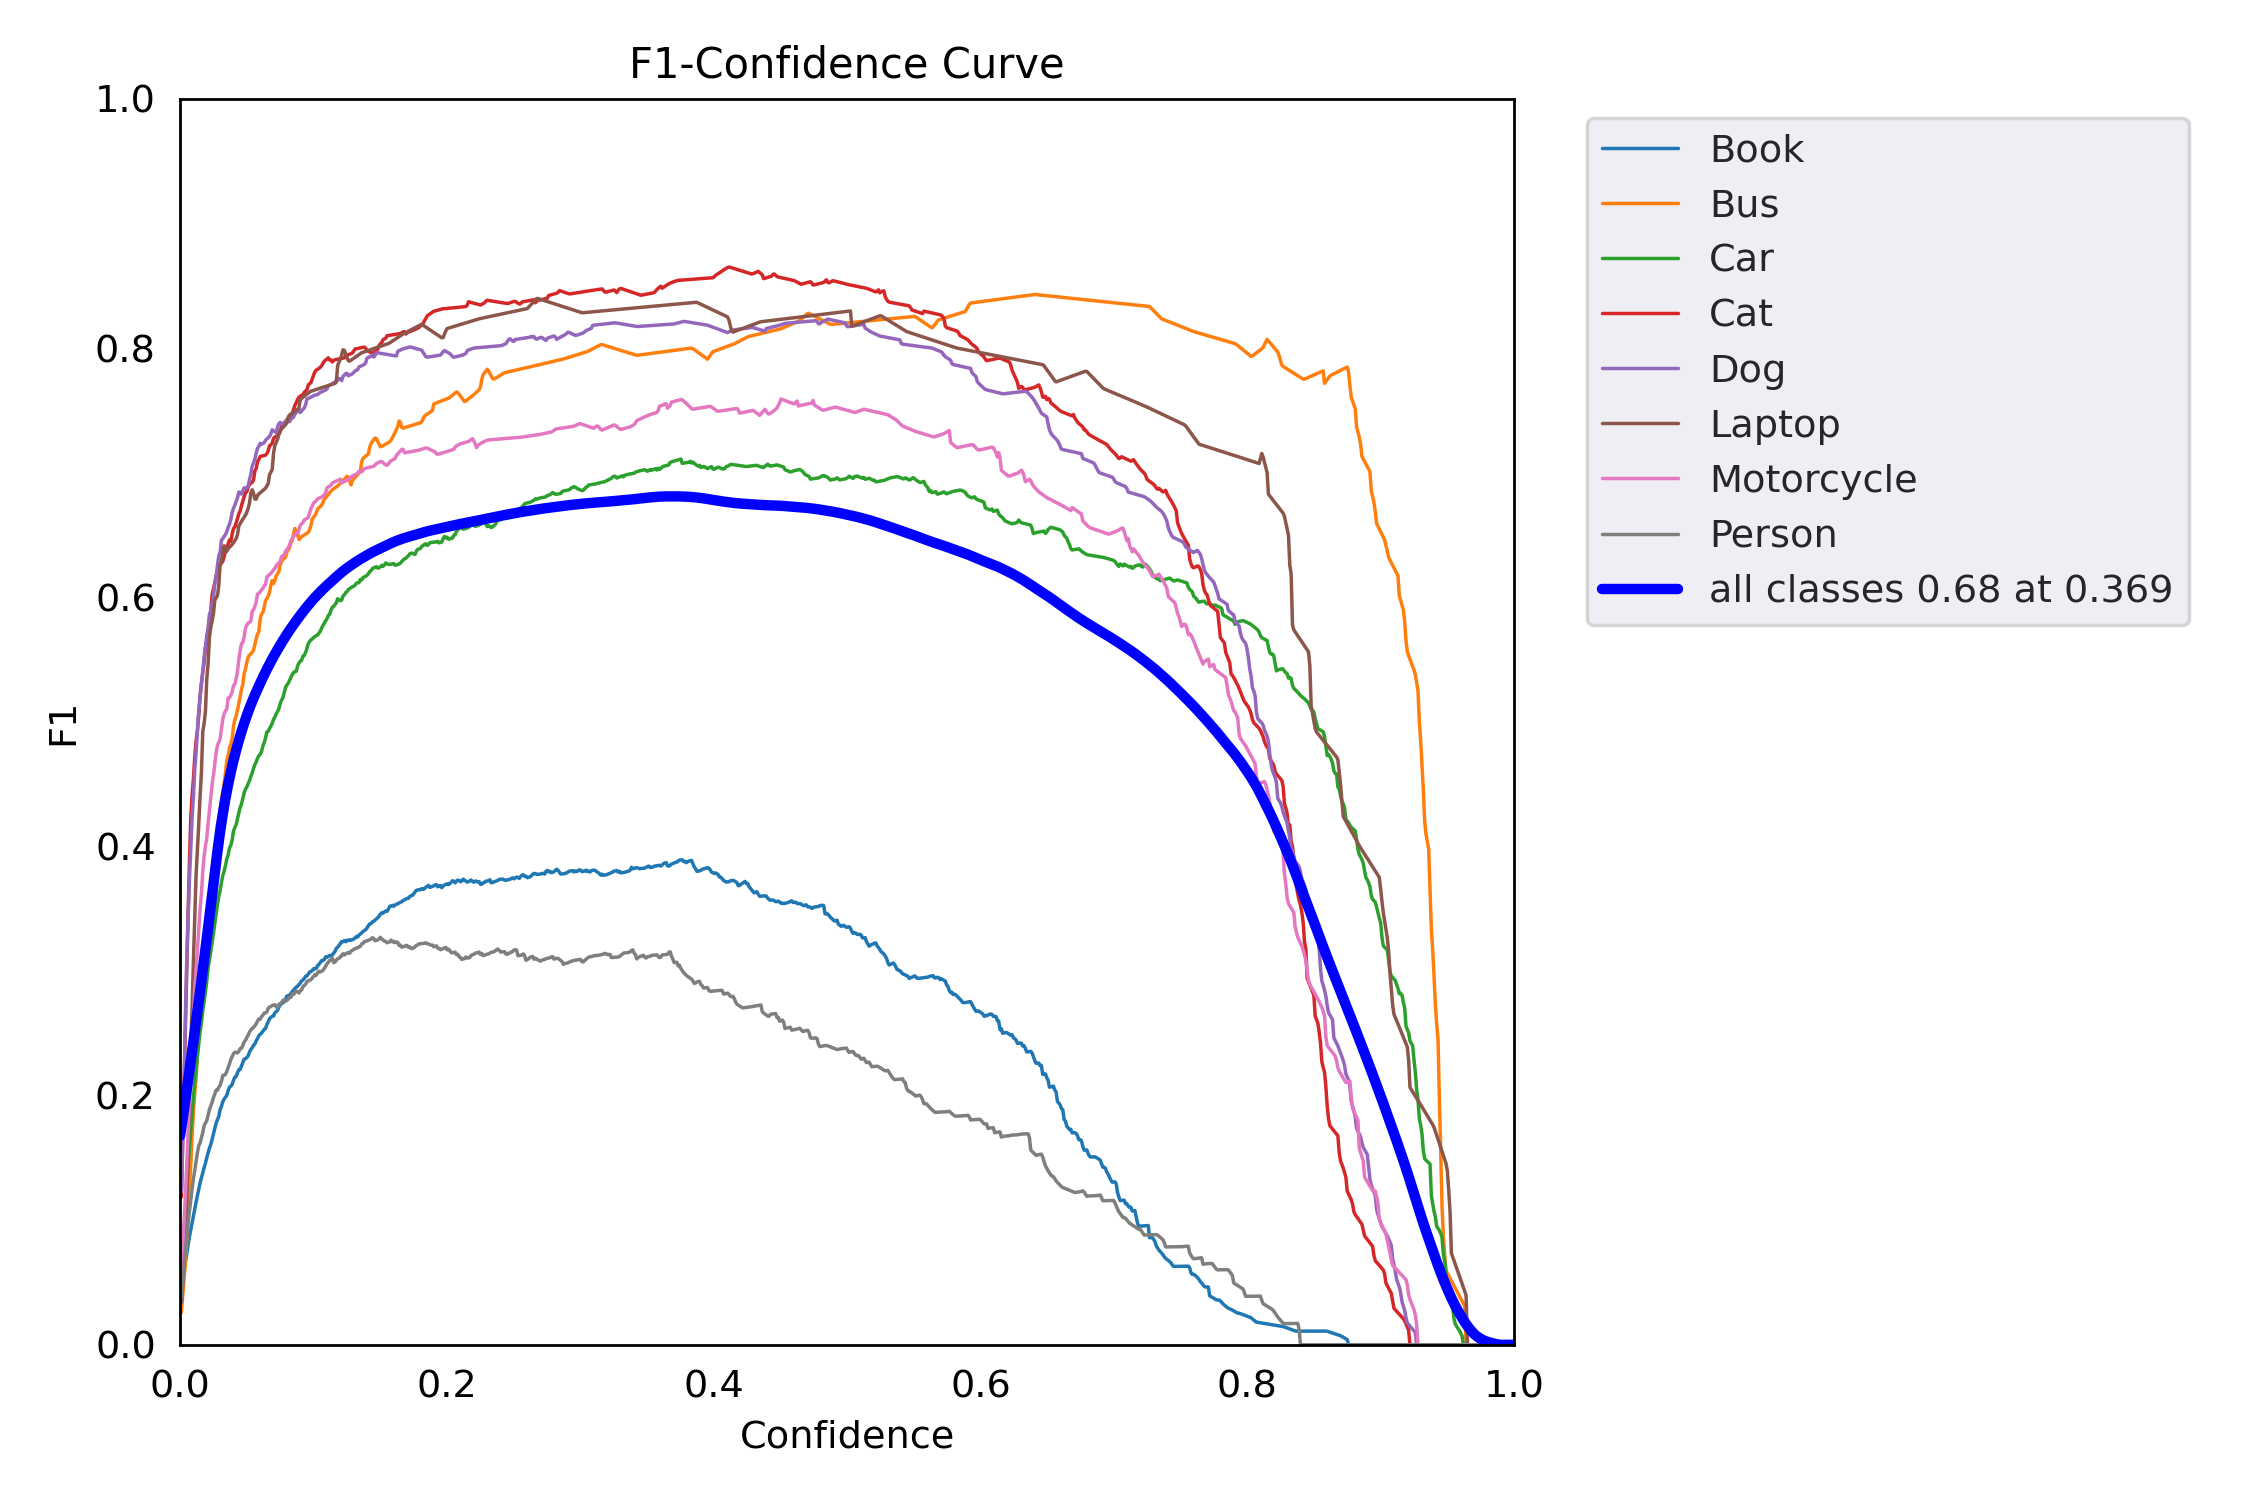

In [11]:
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp8/F1_curve.png', width=1000)  # view results.png

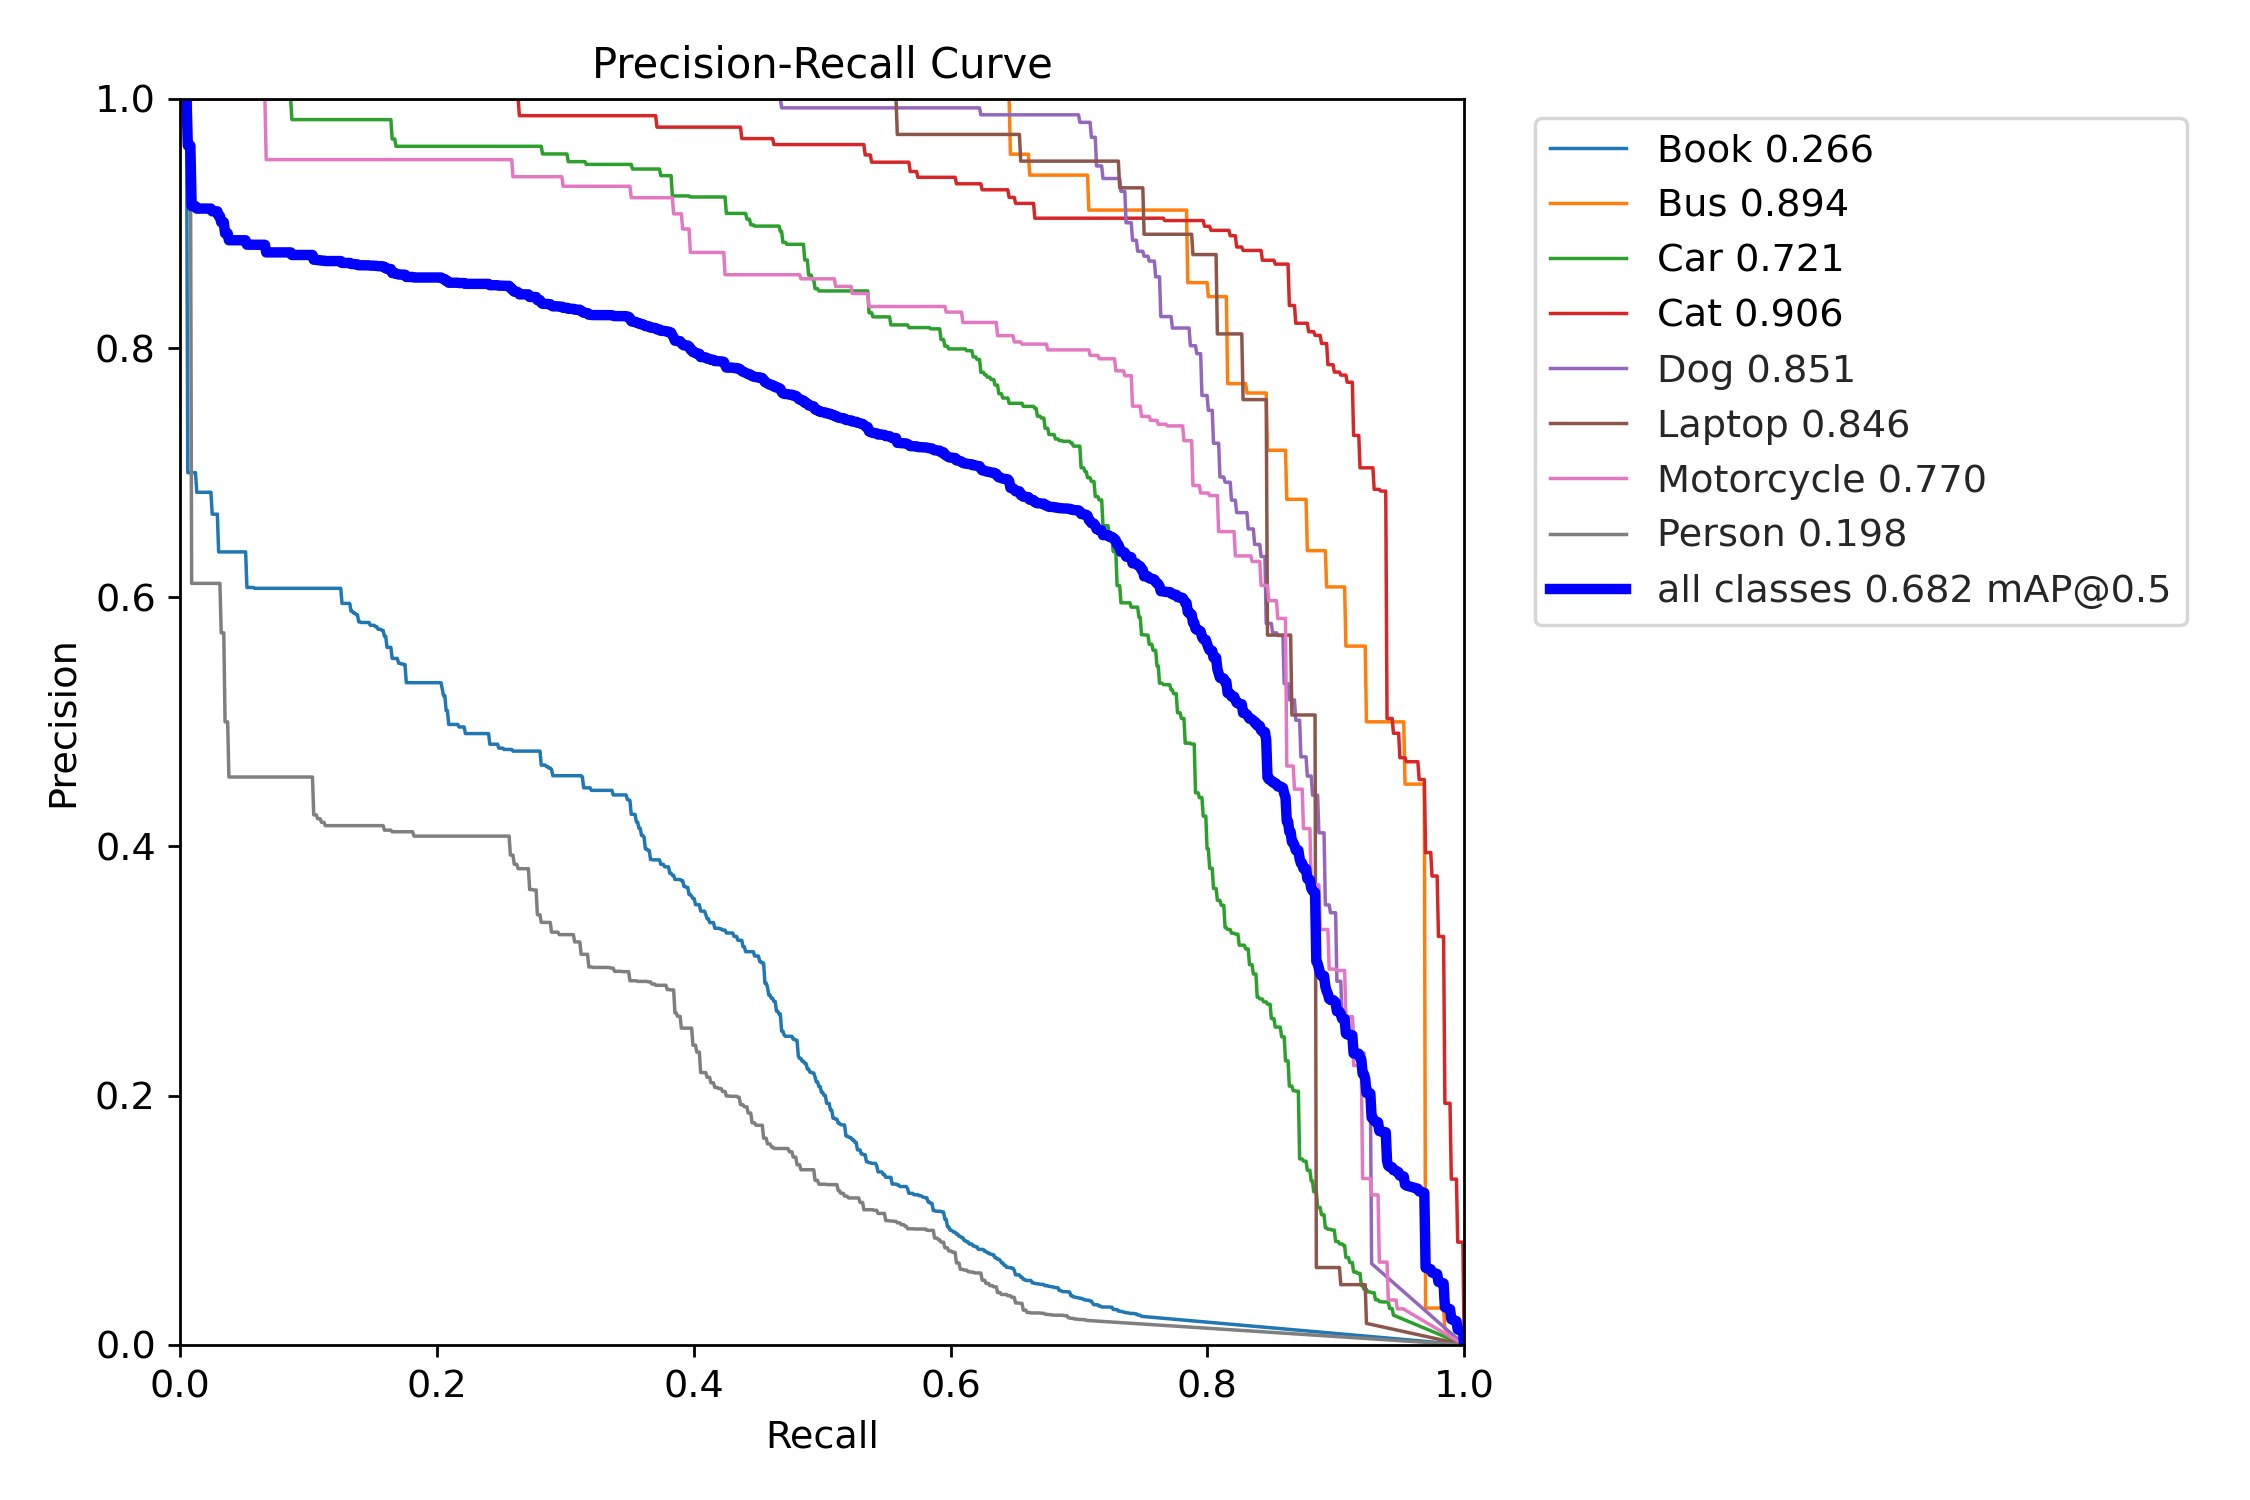

In [12]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp8/PR_curve.png', width=1000)

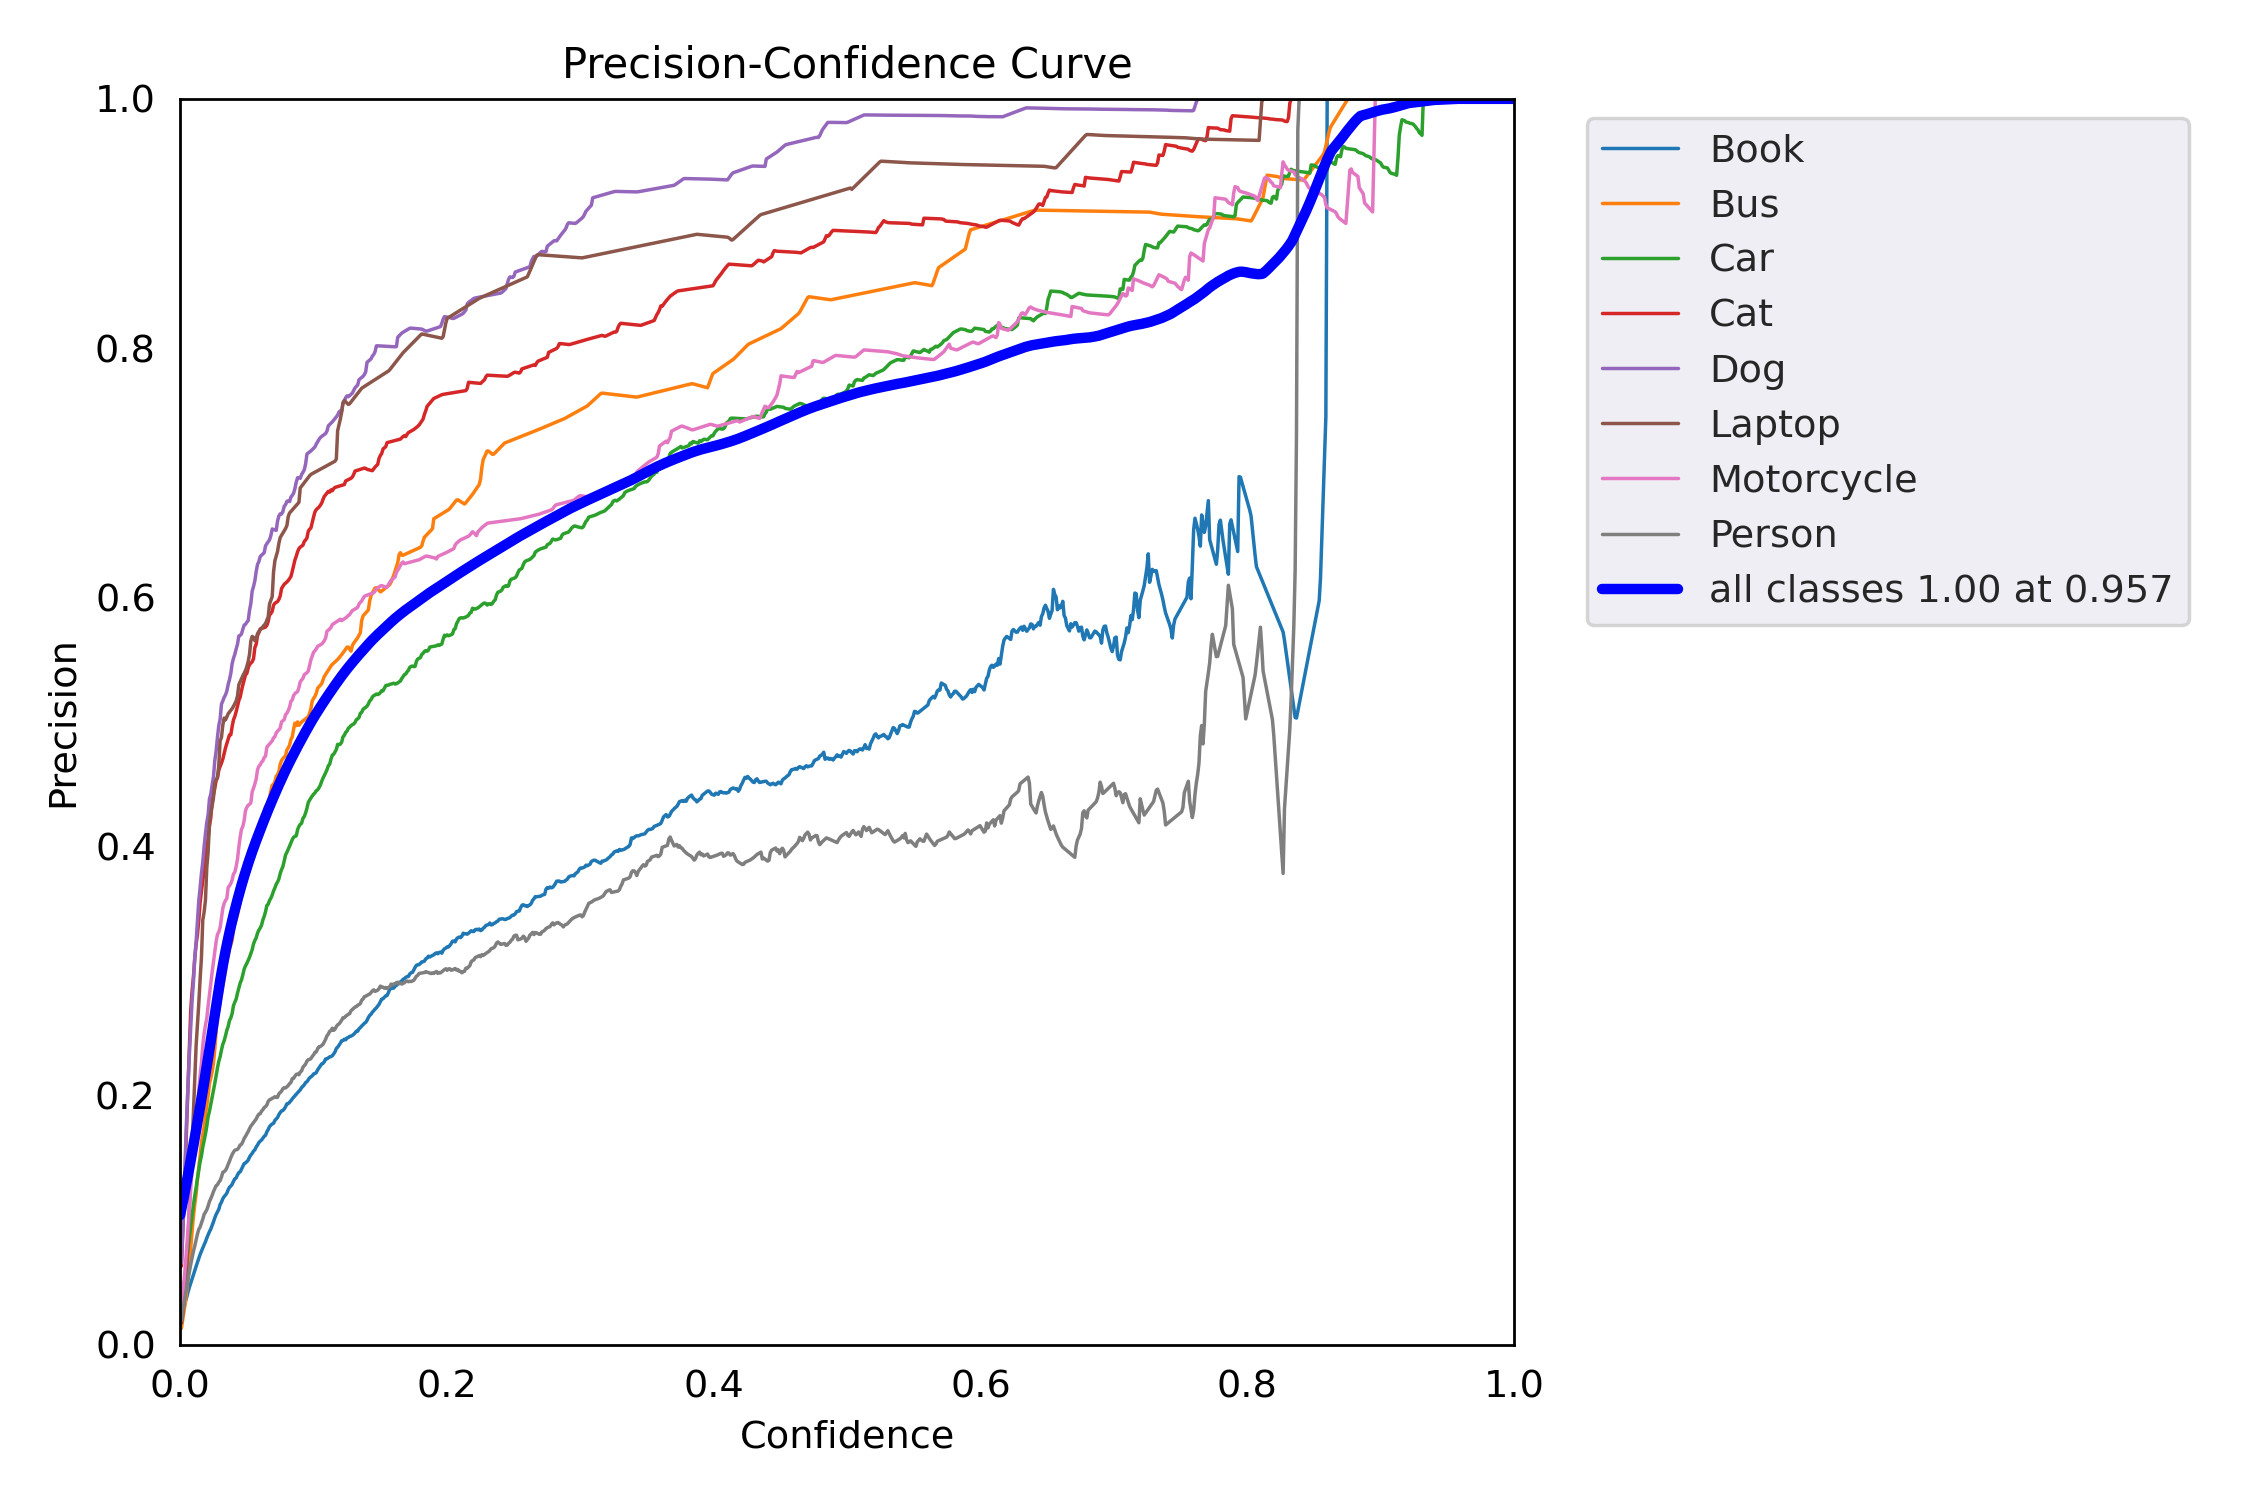

In [13]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp8/P_curve.png', width=1000)

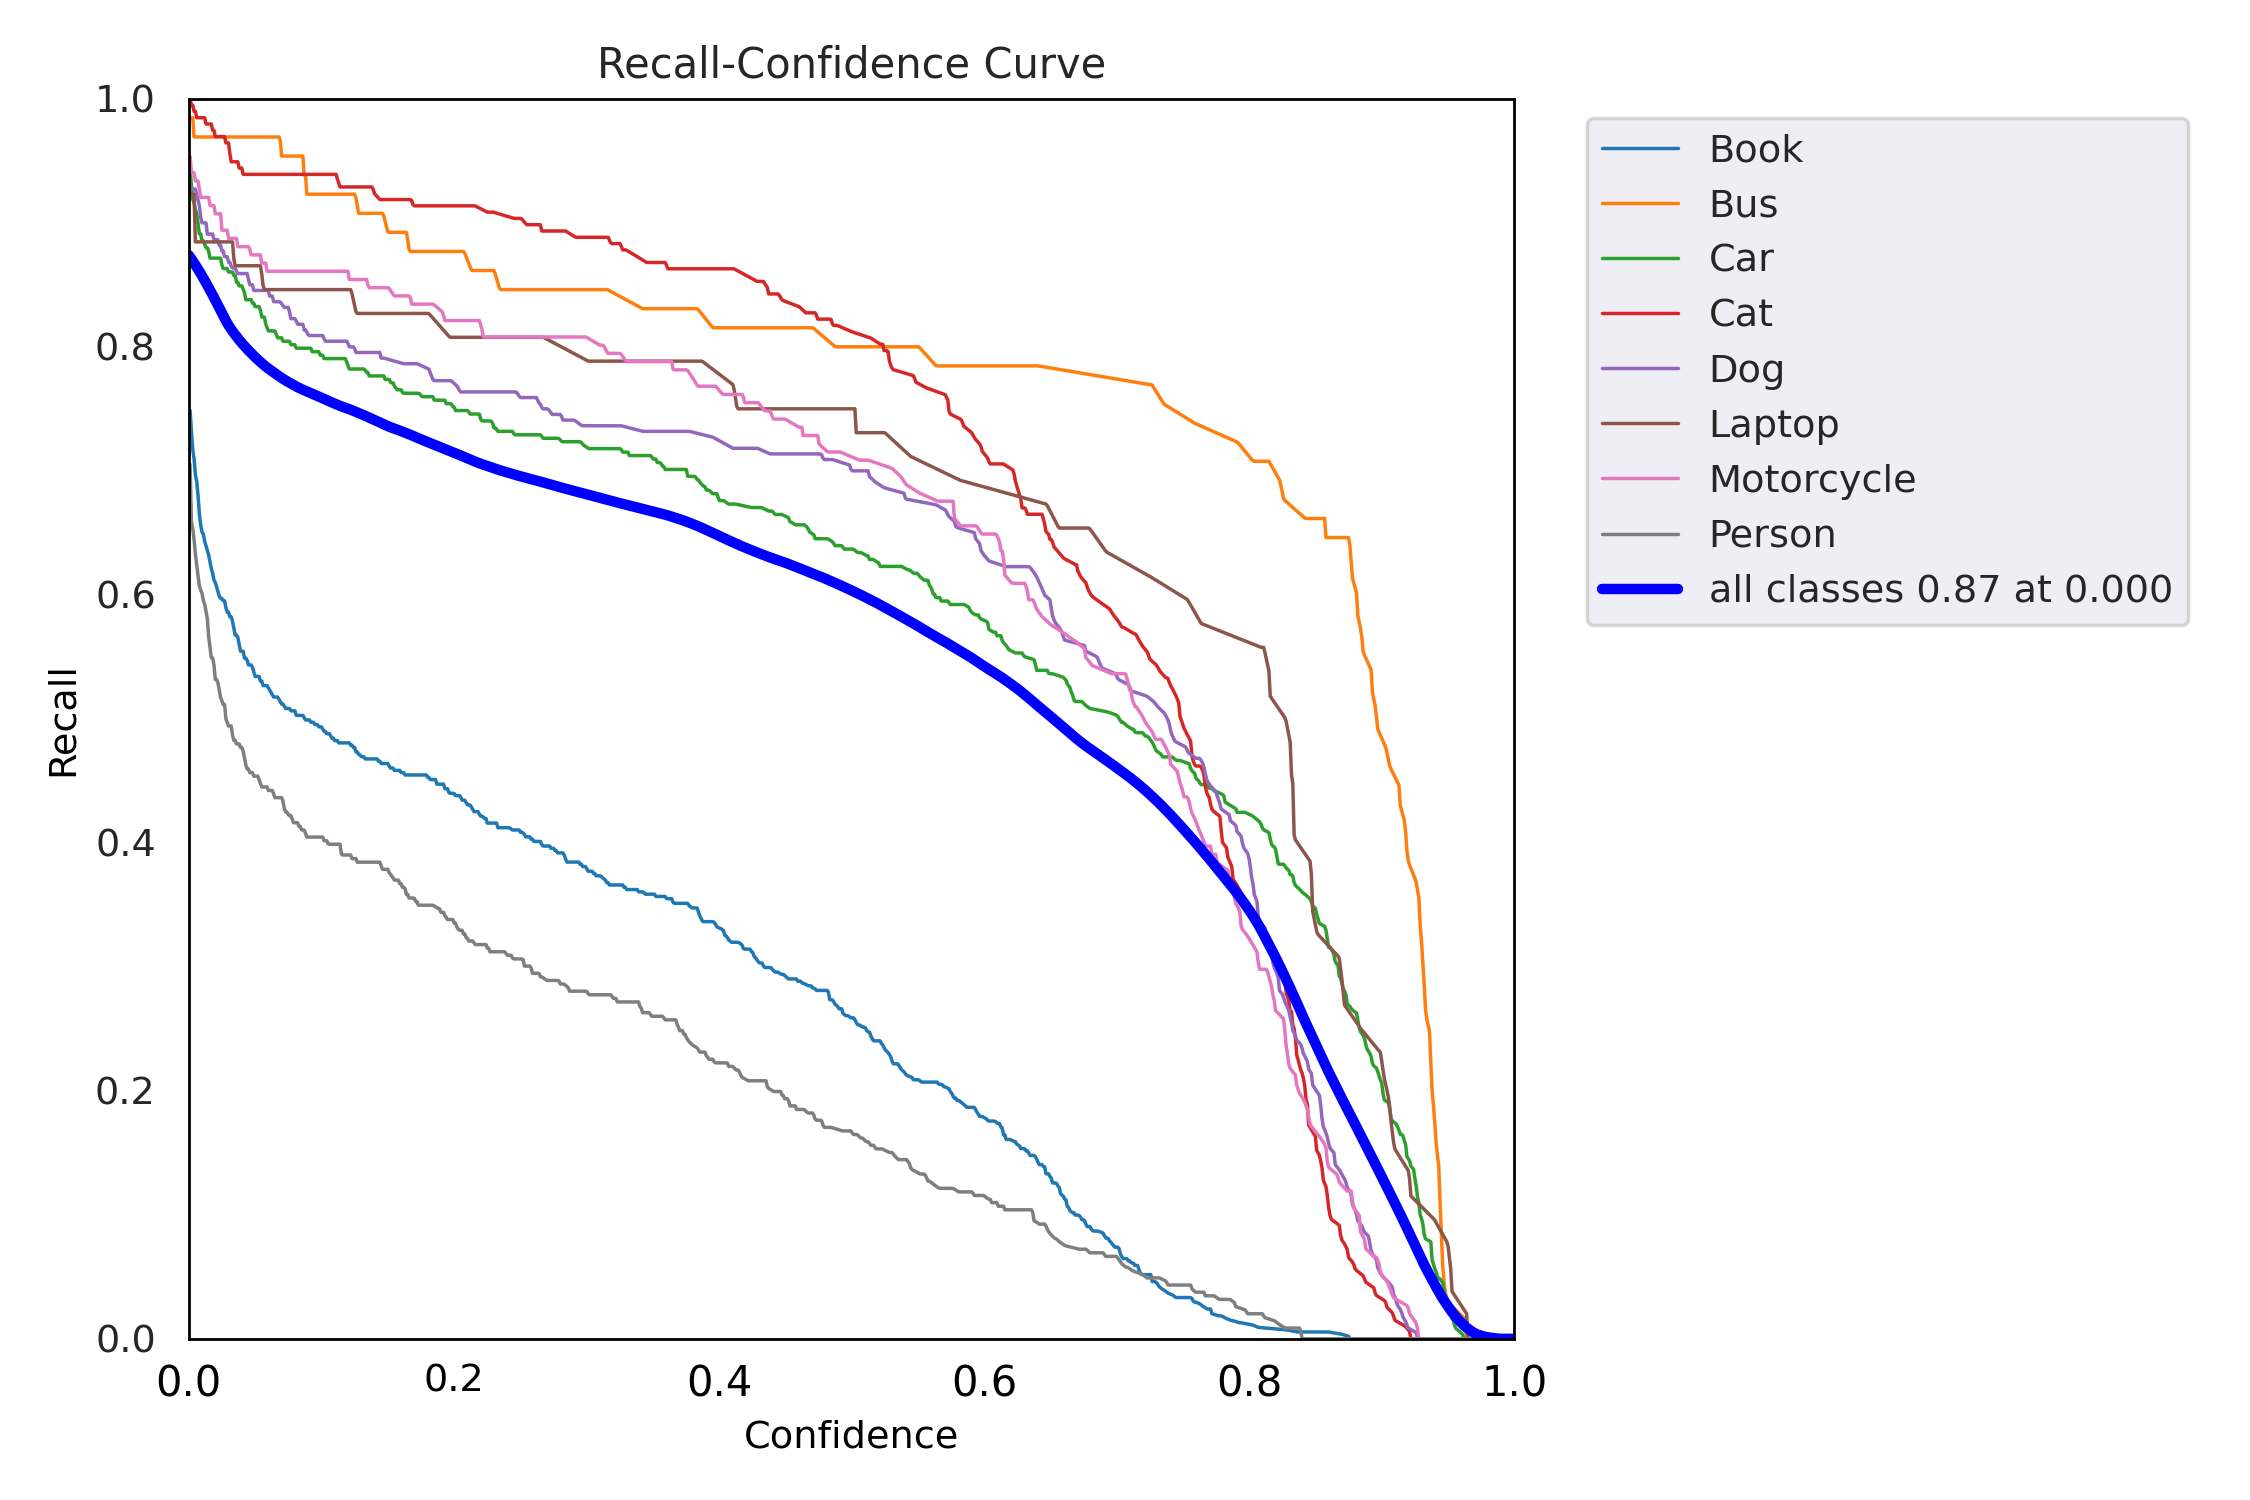

In [14]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp8/R_curve.png', width=1000)

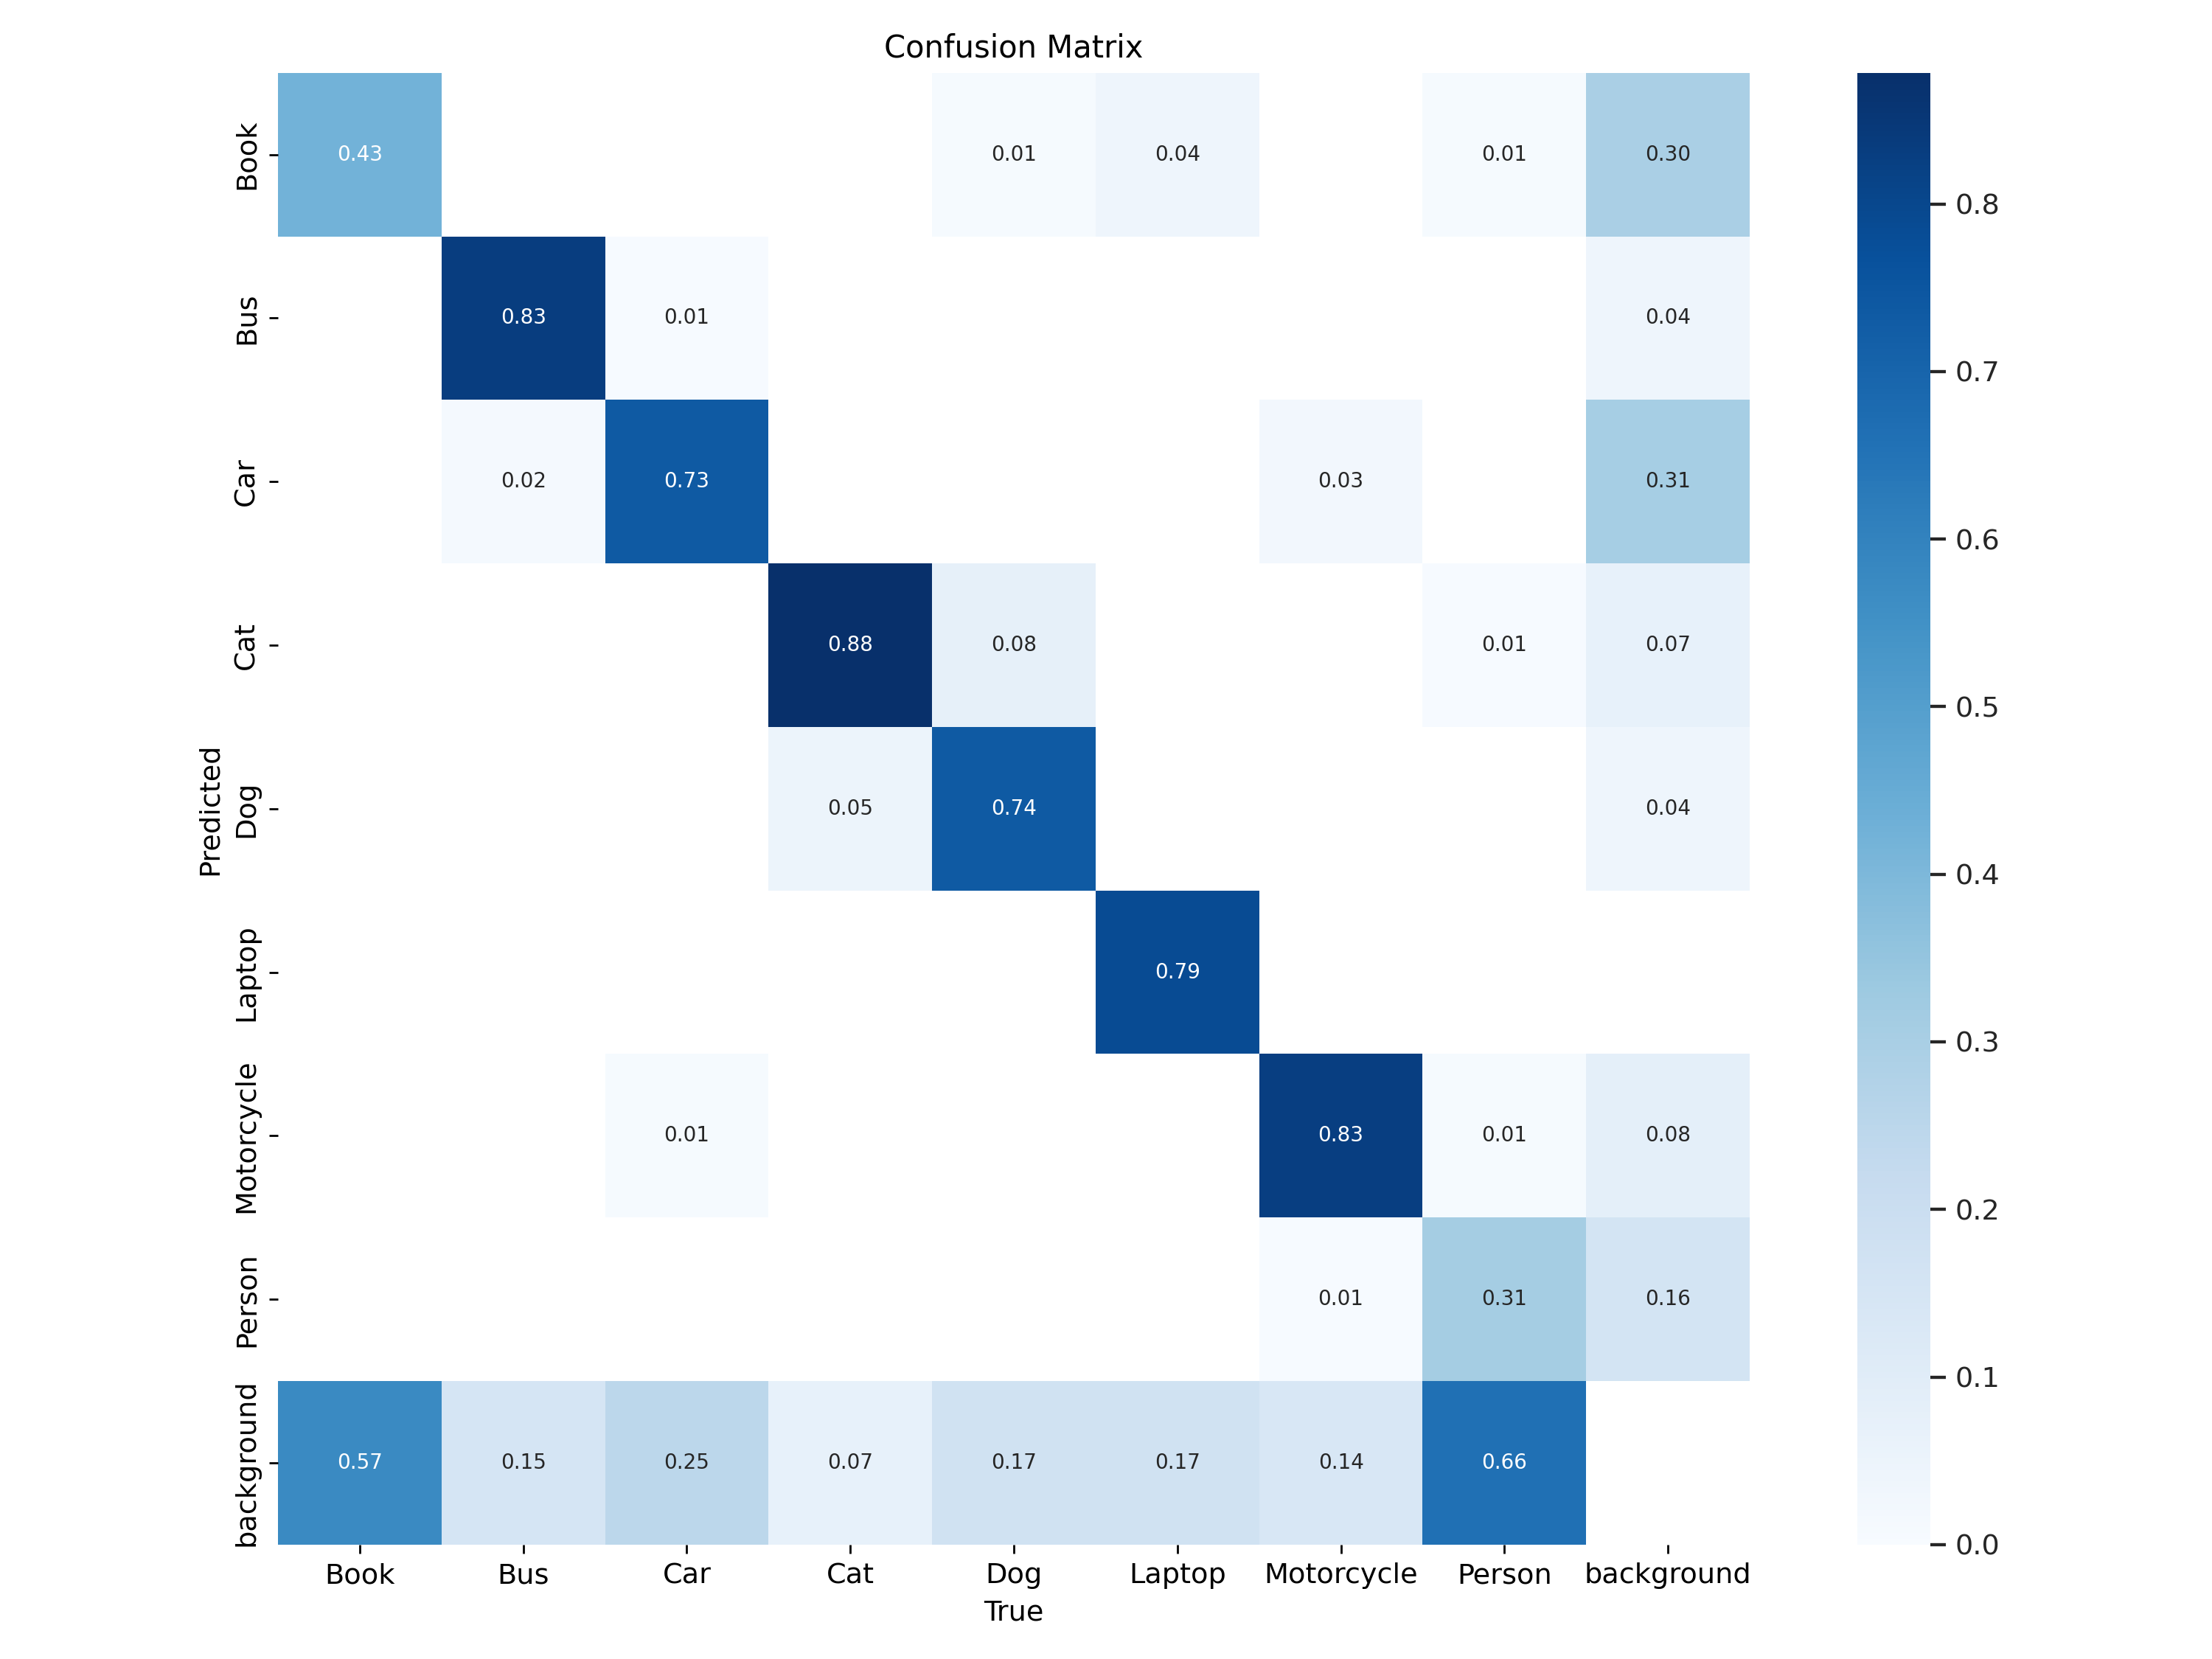

In [16]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp8/confusion_matrix.png', width=1000)

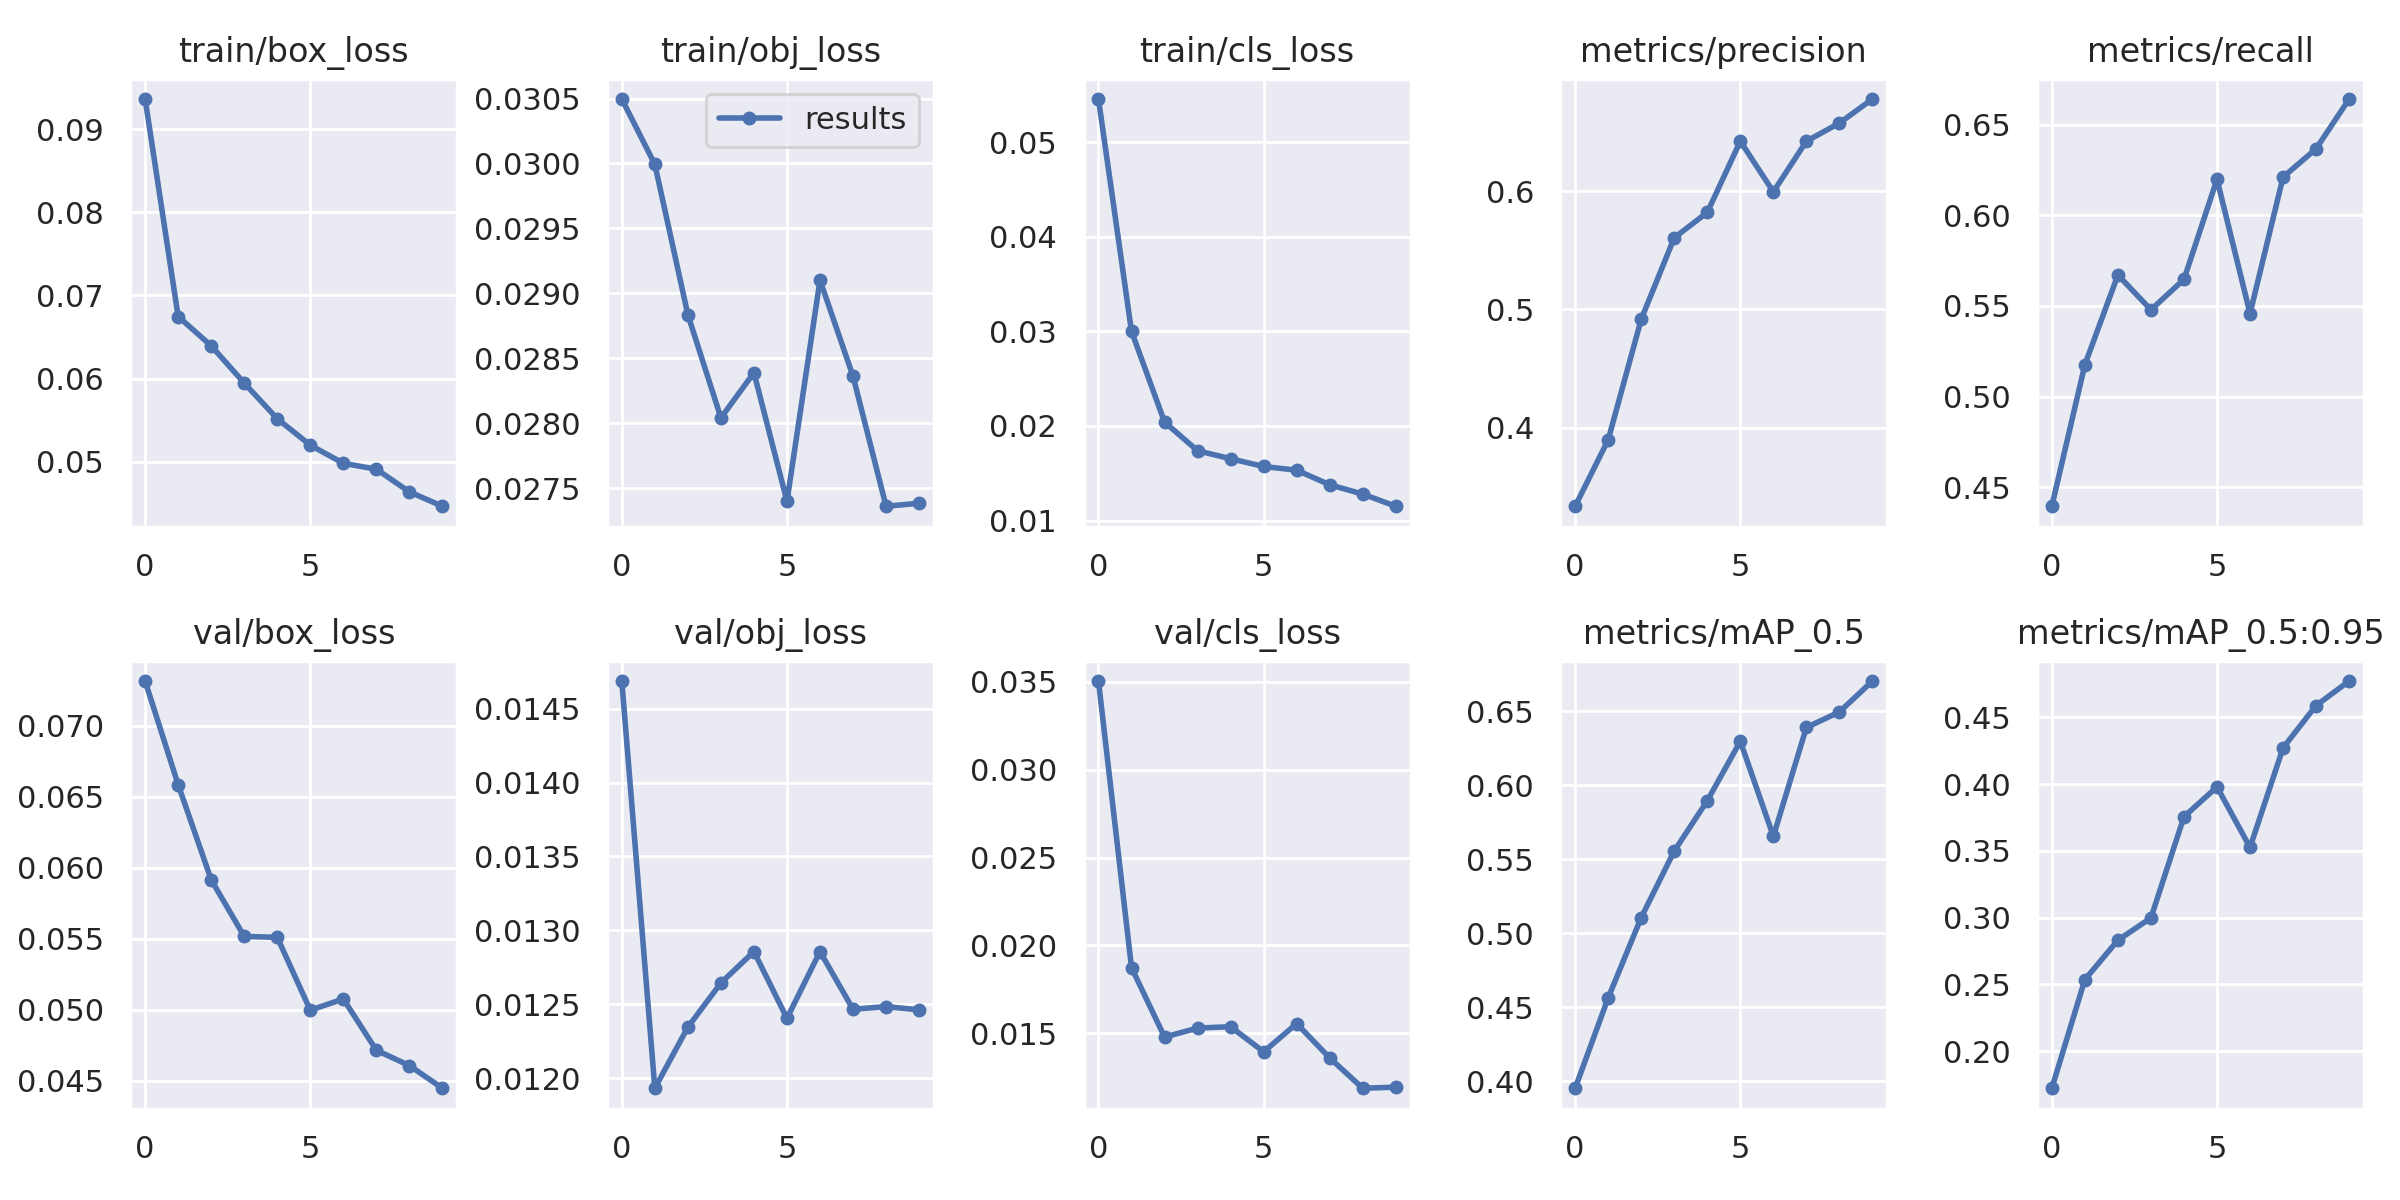

In [ ]:
Image(filename='/content/drive/MyDrive/minor/yolov5model/runs/train/exp8/results.png', width=1000) 